# INFO 1998 Final Project
#### Zack Hurwitz and Atreya Iyer

In [1]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
oly = pd.read_csv("athlete_events.csv")

In [3]:
winners = oly.dropna()
oly["Medal"] = oly["Medal"].fillna("No Medal")
oly.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal


In [4]:
sport = "Swimming"

oly_data = oly.drop(["ID", "Name", "Team", "NOC", "Games", "Season", "City", "Event"], axis=1)
oly_data = oly_data[oly_data["Sport"] == sport].dropna()
oly_data = oly_data[oly_data["Sex"] == "M"]
oly_data = oly_data.drop(["Sex", "Sport"], axis=1)
oly_data.head()

,Age,Height,Weight,Year,Medal
100,21.0,194.0,78.0,1996,No Medal
101,21.0,194.0,78.0,1996,No Medal
102,21.0,194.0,78.0,1996,No Medal
103,25.0,194.0,78.0,2000,No Medal
104,25.0,194.0,78.0,2000,No Medal


In [5]:
cleanup_nums = {"Medal": {"No Medal": 0, "Gold": 1, "Silver": 1, "Bronze": 1}}
oly_data.replace(cleanup_nums, inplace = True)

In [6]:
medals = oly_data["Medal"]

In [7]:
from collections import Counter
c = Counter(medals)
print(c)
inputs = oly_data.drop(["Medal"], axis=1)
total = sum([c[count] for count in c])
total_medals = total - c[0]
print("Guessing no medal: %f" % (1 - total_medals / total))

Counter({0: 9002, 1: 1319})
Guessing no medal: 0.872202


In [8]:
def predict(model, targets, inputs):
    x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
    
    model.fit(x_train, y_train)
    model.predict(x_test)
    print("Score:", model.score(x_test, y_test))
    
    print("Cross-validation of values")
    print(cross_val_score(model, inputs, targets, cv=4, scoring="accuracy"))

In [9]:
dtc = DecisionTreeClassifier()
GRID = GridSearchCV(dtc,
                    param_grid={'max_depth': [5, 10, 20],
                                'max_leaf_nodes': [5, 10, 20, 50],
                                'min_samples_split': [5, 10, 20, 50]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

The parameters of the best model are: 
{'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_split': 5}


In [10]:
dtc = DecisionTreeClassifier(max_depth=5, max_features=None, max_leaf_nodes=5,
                             min_samples_split=5)
predict(dtc, medals, inputs)

Score: 0.87215496368
Cross-validation of values
[ 0.87214258  0.87214258  0.87209302  0.87243117]


In [11]:
knn = KNeighborsClassifier()
GRID = GridSearchCV(knn,
                    param_grid={'n_neighbors': [2, 5, 10, 20],
                                'p': [1, 2, 3],
                                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                'leaf_size': [10, 30, 50, 100]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

The parameters of the best model are: 
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 20, 'p': 1}


In [12]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=20, p=3)
predict(knn, medals, inputs)

Score: 0.870702179177
Cross-validation of values
[ 0.86788067  0.86749322  0.86860465  0.86583947]


In [13]:
# svc = SVC()
# GRID = GridSearchCV(svc,
#                     param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                                 'degree': [2, 3, 4, 5],
#                                 'C': [1.0, 0.5, 0.25, 1.25, 2]},
#                     scoring='accuracy',
#                     cv=2, n_jobs=-1)
# GRID.fit(inputs, medals)
# print('The parameters of the best model are: ')
# print(GRID.best_params_)

In [14]:
mlp = MLPClassifier()
GRID = GridSearchCV(mlp,
                    param_grid={"activation" : ['identity', 'logistic', 'tanh', 'relu'],
                                'solver': ['lbfgs', 'sgd', 'adam'],
                                'batch_size': [10, 200, 400, 100, 50]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:612: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:612: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


The parameters of the best model are: 
{'activation': 'logistic', 'batch_size': 100, 'solver': 'lbfgs'}


In [15]:
mlp = MLPClassifier(activation = 'identity', batch_size = 200, solver = 'sgd')
predict(mlp, medals, inputs)

Score: 0.12784503632
Cross-validation of values
[ 0.87214258  0.87214258  0.12790698  0.87243117]


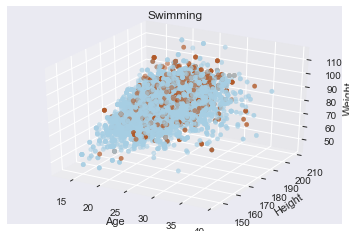

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(oly_data['Age'], oly_data['Height'], oly_data['Weight'], c=medals, cmap=plt.cm.Paired)

# colors = plt.cm.get_cmap('Paired')
# for medal in np.unique(medals):
#     ix = np.where(inputs[0] == medal)
#     ax.scatter(oly_data['Age'].loc[ix],oly_data['Height'].loc[ix],oly_data['Weight'], c = colors(medals), label = oly_data.target_names[medals])


ax.set_title(sport)
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')

plt.show()


In [18]:
print(0.0328084*sum(oly_data['Height']) / len(oly_data['Height']))
print(2.20462*sum(oly_data['Weight']) / len(oly_data['Weight']))

6.04962292084
172.08884357
